<a href="https://colab.research.google.com/github/kavlabs/transfer-learning-for-classification-of-mri-images-as-alzheimer-s-and-parkinson-s/blob/master/kk1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**'ADNI Alzeihmer MRI': "AD",**

**'ADNI Normal MRI': "nAD",**
 
**'PPMI Healthy control MRI': "nPD",**
  
**'PPMI Parkinson MRI': "PD"**

In [ ]:
!nvidia-smi

Sat Jul 11 04:26:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
k = ImageDataGenerator()
image_generator = k.flow_from_directory(directory="/content/drive/My Drive/Comparison paper folder with 1200 MRI/",class_mode='categorical')
print(image_generator.filenames)
print(image_generator.class_indices)
# for i in image_generator:
#   print(i)

Using TensorFlow backend.


Found 4800 images belonging to 4 classes.
['ADNI Alzeihmer MRI/AD MRI (1).png', 'ADNI Alzeihmer MRI/AD MRI (10).png', 'ADNI Alzeihmer MRI/AD MRI (100).png', 'ADNI Alzeihmer MRI/AD MRI (1000).png', 'ADNI Alzeihmer MRI/AD MRI (1001).png', 'ADNI Alzeihmer MRI/AD MRI (1002).png', 'ADNI Alzeihmer MRI/AD MRI (1003).png', 'ADNI Alzeihmer MRI/AD MRI (1004).png', 'ADNI Alzeihmer MRI/AD MRI (1005).png', 'ADNI Alzeihmer MRI/AD MRI (1006).png', 'ADNI Alzeihmer MRI/AD MRI (1007).png', 'ADNI Alzeihmer MRI/AD MRI (1008).png', 'ADNI Alzeihmer MRI/AD MRI (1009).png', 'ADNI Alzeihmer MRI/AD MRI (101).png', 'ADNI Alzeihmer MRI/AD MRI (1010).png', 'ADNI Alzeihmer MRI/AD MRI (1011).png', 'ADNI Alzeihmer MRI/AD MRI (1012).png', 'ADNI Alzeihmer MRI/AD MRI (1013).png', 'ADNI Alzeihmer MRI/AD MRI (1014).png', 'ADNI Alzeihmer MRI/AD MRI (1015).png', 'ADNI Alzeihmer MRI/AD MRI (1016).png', 'ADNI Alzeihmer MRI/AD MRI (1017).png', 'ADNI Alzeihmer MRI/AD MRI (1018).png', 'ADNI Alzeihmer MRI/AD MRI (1019).png', 'ADN

**VGG16 TRANSFER LEARNING-**

58892288/58889256 [==============================] - 6s 0us/step
Model loaded.
1e-05
Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
Model: "model_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_21 (InputLayer)        (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
___________

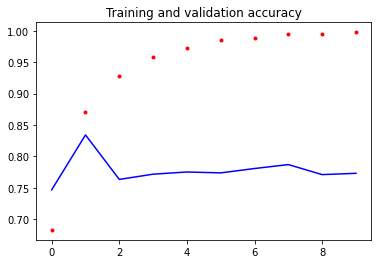

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import applications
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import confusion_matrix
 
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.show()
    plt.savefig('acc_vs_epochs.png')
 
class TestCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    self.test_data = test_data
 
  def on_epoch_end(self, epoch, logs={}):
      a1 = 0
      a2 = 0
      a3 = 0
      a4 = 0
      for u in range(self.test_data.samples // batch_size):
        x, y = self.test_data[u]
        pred = self.model.predict(x)
        true = y
        prediction = np.argmax(pred,axis=1)
        label = np.argmax(true,axis=1)
        acc1 = 0
        acc2 = 0
        acc3 = 0
        acc4 = 0
        tar1 = label[label==0]
        tar2 = label[label==1]
        tar3 = label[label==2]
        tar4 = label[label==3]
        size_of_AD = len(tar1)
        size_of_nAD = len(tar2)
        size_of_nPD = len(tar3)
        size_of_PD = len(tar4)
        for i in range(len(label)):
            if label[i]==0:
                if prediction[i]==0:
                    acc1 += 1/size_of_AD
        a1+=acc1
        for i in range(len(label)):
            if label[i]==1:
                if prediction[i]==1:
                    acc2 += 1/size_of_nAD
        a2+=acc2
        for i in range(len(label)):
            if label[i]==2:
                if prediction[i]==2:
                    acc3 += 1/size_of_nPD
        a3+=acc3
        for i in range(len(label)):
            if label[i]==3:
                if prediction[i]==3:
                    acc4 += 1/size_of_PD
        a4+=acc4
      print('\n AD accuracy:{}\n'.format(a1/36))
      print('\n nAD accuracy:{}\n'.format(a2/36))
      print('\n nPD accuracy:{}\n'.format(a3/36))
      print('\n PD accuracy:{}\n'.format(a4/36))
 
img_width, img_height = 224, 224
 
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
epochs = 10
batch_size = 40
 
base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
print('Model loaded.')
 
inp = base_model.input
new_classification_layer = base_model.output
new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dropout(0.3)(new_classification_layer)
new_classification_layer = Dense(4, activation='softmax')(new_classification_layer)
model = Model(inputs=inp, outputs=new_classification_layer)
 
for layer in model.layers[:15]:
    layer.trainable = False
 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0, amsgrad=False), metrics=["accuracy"])
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.SGD(lr=5e-3, momentum=0.9),
#               metrics=['accuracy'])
print(K.eval(model.optimizer.lr))
filepath = "/content/drive/My Drive/kk1/modelvgg16.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
# k = TestCallback()
# callbacks_list = [checkpoint,k]
 
# train_datagen = ImageDataGenerator(validation_split=0.3,preprocessing_function=preprocess_input)
# train_datagen = ImageDataGenerator(validation_split=0.3)
train_datagen = ImageDataGenerator(validation_split=0.3,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
k = TestCallback(validation_generator)
callbacks_list = [checkpoint,k]
# print(np.size(train_generator))
print(train_generator.class_indices)
print(validation_generator.class_indices)
model.summary()
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)
# hist = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     verbose=2)
# Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size)
# y_pred = np.argmax(Y_pred, axis=1)
# print('Confusion Matrix')
# print(confusion_matrix(validation_generator.classes, y_pred))
hist_df = pd.DataFrame(hist.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
plot_training(hist)
model.save('kk')

**VGG16 confusion matrix-**

Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
Confusion Matrix
[[360   0   0   0]
 [165 195   0   0]
 [  0   0 264  96]
 [  0   0  66 294]]
                          precision    recall  f1-score   support

      ADNI Alzeihmer MRI       0.69      1.00      0.81       360
         ADNI Normal MRI       1.00      0.54      0.70       360
PPMI Healthy control MRI       0.80      0.73      0.77       360
      PPMI Parkinson MRI       0.75      0.82      0.78       360

                accuracy                           0.77      1440
               macro avg       0.81      0.77      0.77      1440
            weighted avg       0.81      0.77      0.77      1440



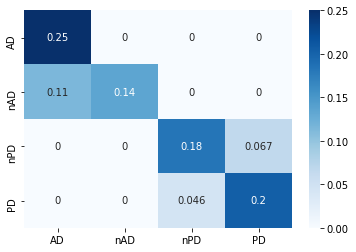

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
img_width, img_height = 224, 224
filepath = "/content/drive/My Drive/kk1/modelvgg16.h5"
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
batch_size = 40
val_split = 0.3
totalpics = 4800
# load the model
model = load_model(filepath)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation')
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
print('Confusion Matrix')
k1 = confusion_matrix(validation_generator.classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)
sns.heatmap(k1/np.sum(k1), annot=True, cmap='Blues',xticklabels = ["AD","nAD","nPD","PD"], yticklabels = ["AD","nAD","nPD","PD"])
# plt.show()

**VGG19-**

Model loaded.
1e-05
Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv

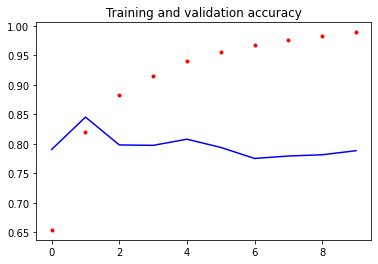

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import applications
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
 
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.show()
    plt.savefig('acc_vs_epochs.png')
 
class TestCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    self.test_data = test_data
 
  def on_epoch_end(self, epoch, logs={}):
      a1 = 0
      a2 = 0
      a3 = 0
      a4 = 0
      for u in range(self.test_data.samples // batch_size):
        x, y = self.test_data[u]
        pred = self.model.predict(x)
        true = y
        prediction = np.argmax(pred,axis=1)
        label = np.argmax(true,axis=1)
        acc1 = 0
        acc2 = 0
        acc3 = 0
        acc4 = 0
        tar1 = label[label==0]
        tar2 = label[label==1]
        tar3 = label[label==2]
        tar4 = label[label==3]
        size_of_AD = len(tar1)
        size_of_nAD = len(tar2)
        size_of_nPD = len(tar3)
        size_of_PD = len(tar4)
        for i in range(len(label)):
            if label[i]==0:
                if prediction[i]==0:
                    acc1 += 1/size_of_AD
        a1+=acc1
        for i in range(len(label)):
            if label[i]==1:
                if prediction[i]==1:
                    acc2 += 1/size_of_nAD
        a2+=acc2
        for i in range(len(label)):
            if label[i]==2:
                if prediction[i]==2:
                    acc3 += 1/size_of_nPD
        a3+=acc3
        for i in range(len(label)):
            if label[i]==3:
                if prediction[i]==3:
                    acc4 += 1/size_of_PD
        a4+=acc4
      print('\n AD accuracy:{}\n'.format(a1/36))
      print('\n nAD accuracy:{}\n'.format(a2/36))
      print('\n nPD accuracy:{}\n'.format(a3/36))
      print('\n PD accuracy:{}\n'.format(a4/36))
 
img_width, img_height = 224, 224
 
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
epochs = 10
batch_size = 40
val_split = 0.3
totalpics = 4800
 
base_model = applications.VGG19(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
print('Model loaded.')
 
inp = base_model.input
new_classification_layer = base_model.output
new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dropout(0.3)(new_classification_layer)
new_classification_layer = Dense(4, activation='softmax')(new_classification_layer)
model = Model(inputs=inp, outputs=new_classification_layer)
 
for layer in model.layers[:-6]:
    layer.trainable = False
 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0, amsgrad=False), metrics=["accuracy"])
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.SGD(lr=5e-3, momentum=0.9),
#               metrics=['accuracy'])
print(K.eval(model.optimizer.lr))
filepath = "/content/drive/My Drive/kk1/modelvgg19.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
# k = TestCallback()
# callbacks_list = [checkpoint,k]
 
# train_datagen = ImageDataGenerator(validation_split=0.3,preprocessing_function=preprocess_input)
# train_datagen = ImageDataGenerator(validation_split=0.3)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
k = TestCallback(validation_generator)
callbacks_list = [checkpoint,k]
# print(np.size(train_generator))
print(train_generator.class_indices)
print(validation_generator.class_indices)
model.summary()
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)
# hist = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     verbose=2)
 
hist_df = pd.DataFrame(hist.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
plot_training(hist)
model.save('kk')

**VGG19 confusion matrix-**

Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
Confusion Matrix
[[360   0   0   0]
 [152 208   0   0]
 [  0   0 247 113]
 [  0   0  40 320]]
                          precision    recall  f1-score   support

      ADNI Alzeihmer MRI       0.70      1.00      0.83       360
         ADNI Normal MRI       1.00      0.58      0.73       360
PPMI Healthy control MRI       0.86      0.69      0.76       360
      PPMI Parkinson MRI       0.74      0.89      0.81       360

                accuracy                           0.79      1440
               macro avg       0.83      0.79      0.78      1440
            weighted avg       0.83      0.79      0.78      1440



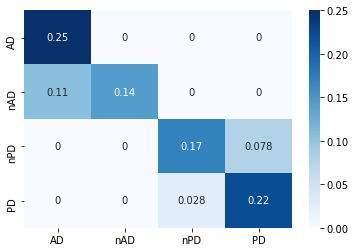

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
img_width, img_height = 224, 224
filepath = "/content/drive/My Drive/kk1/modelvgg19.h5"
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
batch_size = 40
val_split = 0.3
totalpics = 4800
# load the model
model = load_model(filepath)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation')
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
print('Confusion Matrix')
k1 = confusion_matrix(validation_generator.classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)
sns.heatmap(k1/np.sum(k1), annot=True, cmap='Blues',xticklabels = ["AD","nAD","nPD","PD"], yticklabels = ["AD","nAD","nPD","PD"])
# plt.show()

**INCEPTIONv3-**

Model loaded.
1e-05
Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
Model: "model_12"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_14 (InputLayer)           (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_377 (Conv2D)             (None, 149, 149, 32) 864         input_14[0][0]                   
__________________________________________________________________________________________________
batch_normalization_377 (BatchN (None, 149, 149, 32) 96          conv2d_377[

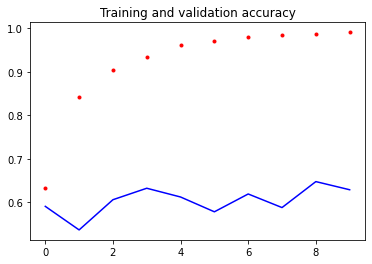

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import applications
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
 
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.show()
    plt.savefig('acc_vs_epochs.png')
 
class TestCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    self.test_data = test_data
 
  def on_epoch_end(self, epoch, logs={}):
      a1 = 0
      a2 = 0
      a3 = 0
      a4 = 0
      for u in range(self.test_data.samples // batch_size):
        x, y = self.test_data[u]
        pred = self.model.predict(x)
        true = y
        prediction = np.argmax(pred,axis=1)
        label = np.argmax(true,axis=1)
        acc1 = 0
        acc2 = 0
        acc3 = 0
        acc4 = 0
        tar1 = label[label==0]
        tar2 = label[label==1]
        tar3 = label[label==2]
        tar4 = label[label==3]
        size_of_AD = len(tar1)
        size_of_nAD = len(tar2)
        size_of_nPD = len(tar3)
        size_of_PD = len(tar4)
        for i in range(len(label)):
            if label[i]==0:
                if prediction[i]==0:
                    acc1 += 1/size_of_AD
        a1+=acc1
        for i in range(len(label)):
            if label[i]==1:
                if prediction[i]==1:
                    acc2 += 1/size_of_nAD
        a2+=acc2
        for i in range(len(label)):
            if label[i]==2:
                if prediction[i]==2:
                    acc3 += 1/size_of_nPD
        a3+=acc3
        for i in range(len(label)):
            if label[i]==3:
                if prediction[i]==3:
                    acc4 += 1/size_of_PD
        a4+=acc4
      print('\n AD accuracy:{}\n'.format(a1/36))
      print('\n nAD accuracy:{}\n'.format(a2/36))
      print('\n nPD accuracy:{}\n'.format(a3/36))
      print('\n PD accuracy:{}\n'.format(a4/36))
 
img_width, img_height = 299, 299
 
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
epochs = 10
batch_size = 40
val_split = 0.3
totalpics = 4800
 
base_model = applications.InceptionV3(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
print('Model loaded.')
 
inp = base_model.input
new_classification_layer = base_model.output
new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dropout(0.3)(new_classification_layer)
new_classification_layer = Dense(4, activation='softmax')(new_classification_layer)
model = Model(inputs=inp, outputs=new_classification_layer)
 
for layer in model.layers[:-6]:
    layer.trainable = False
 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0, amsgrad=False), metrics=["accuracy"])
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.SGD(lr=5e-3, momentum=0.9),
#               metrics=['accuracy'])
print(K.eval(model.optimizer.lr))
filepath = "/content/drive/My Drive/kk1/modelInceptionV3.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
# k = TestCallback()
# callbacks_list = [checkpoint,k]
 
# train_datagen = ImageDataGenerator(validation_split=0.3,preprocessing_function=preprocess_input)
# train_datagen = ImageDataGenerator(validation_split=0.3)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
k = TestCallback(validation_generator)
callbacks_list = [checkpoint,k]
# print(np.size(train_generator))
print(train_generator.class_indices)
print(validation_generator.class_indices)
model.summary()
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)# hist = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     verbose=2)
 
hist_df = pd.DataFrame(hist.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
plot_training(hist)
model.save('kk')

**InceptionV3 confusion matrix-**

Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
Confusion Matrix
[[357   2   1   0]
 [284  74   2   0]
 [  0   0 276  84]
 [  0   0 161 199]]
                          precision    recall  f1-score   support

      ADNI Alzeihmer MRI       0.56      0.99      0.71       360
         ADNI Normal MRI       0.97      0.21      0.34       360
PPMI Healthy control MRI       0.63      0.77      0.69       360
      PPMI Parkinson MRI       0.70      0.55      0.62       360

                accuracy                           0.63      1440
               macro avg       0.72      0.63      0.59      1440
            weighted avg       0.72      0.63      0.59      1440



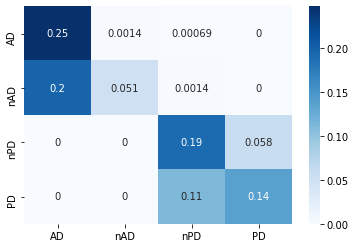

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
img_width, img_height = 299, 299
filepath = "/content/drive/My Drive/kk1/modelInceptionV3.h5"
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
batch_size = 40
val_split = 0.3
totalpics = 4800
# load the model
model = load_model(filepath)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation')
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
print('Confusion Matrix')
k1 = confusion_matrix(validation_generator.classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)
sns.heatmap(k1/np.sum(k1), annot=True, cmap='Blues',xticklabels = ["AD","nAD","nPD","PD"], yticklabels = ["AD","nAD","nPD","PD"])
# plt.show()

**ResNet50V2-**

94674944/94668760 [==============================] - 2s 0us/step
Model loaded.
1e-05
Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
{'ADNI Alzeihmer MRI': 0, 'ADNI Normal MRI': 1, 'PPMI Healthy control MRI': 2, 'PPMI Parkinson MRI': 3}
Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (

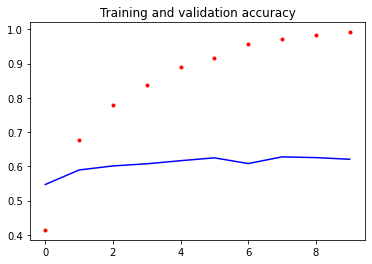

<Figure size 432x288 with 0 Axes>

In [ ]:
from keras import applications
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import preprocess_input
from keras import optimizers
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dropout, Flatten, Dense,GlobalAveragePooling2D
from keras.callbacks import ModelCheckpoint
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
 
def plot_training(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))
    plt.plot(epochs, acc, 'r.')
    plt.plot(epochs, val_acc, 'b')
    plt.title('Training and validation accuracy')
    plt.show()
    plt.savefig('acc_vs_epochs.png')
 
class TestCallback(tf.keras.callbacks.Callback):
  def __init__(self, test_data):
    self.test_data = test_data
 
  def on_epoch_end(self, epoch, logs={}):
      a1 = 0
      a2 = 0
      a3 = 0
      a4 = 0
      for u in range(self.test_data.samples // batch_size):
        x, y = self.test_data[u]
        pred = self.model.predict(x)
        true = y
        prediction = np.argmax(pred,axis=1)
        label = np.argmax(true,axis=1)
        acc1 = 0
        acc2 = 0
        acc3 = 0
        acc4 = 0
        tar1 = label[label==0]
        tar2 = label[label==1]
        tar3 = label[label==2]
        tar4 = label[label==3]
        size_of_AD = len(tar1)
        size_of_nAD = len(tar2)
        size_of_nPD = len(tar3)
        size_of_PD = len(tar4)
        for i in range(len(label)):
            if label[i]==0:
                if prediction[i]==0:
                    acc1 += 1/size_of_AD
        a1+=acc1
        for i in range(len(label)):
            if label[i]==1:
                if prediction[i]==1:
                    acc2 += 1/size_of_nAD
        a2+=acc2
        for i in range(len(label)):
            if label[i]==2:
                if prediction[i]==2:
                    acc3 += 1/size_of_nPD
        a3+=acc3
        for i in range(len(label)):
            if label[i]==3:
                if prediction[i]==3:
                    acc4 += 1/size_of_PD
        a4+=acc4
      print('\n AD accuracy:{}\n'.format(a1/36))
      print('\n nAD accuracy:{}\n'.format(a2/36))
      print('\n nPD accuracy:{}\n'.format(a3/36))
      print('\n PD accuracy:{}\n'.format(a4/36))
 
img_width, img_height = 224, 224
 
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
epochs = 10
batch_size = 40
val_split = 0.3
totalpics = 4800
 
base_model = applications.ResNet50V2(weights='imagenet', include_top=False, input_shape=(img_height,img_width,3))
print('Model loaded.')
 
inp = base_model.input
new_classification_layer = base_model.output
new_classification_layer = GlobalAveragePooling2D()(new_classification_layer)
# new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dense(2048, activation='relu')(new_classification_layer) 
# new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dropout(0.5)(new_classification_layer)
new_classification_layer = Dense(1024, activation='relu')(new_classification_layer) 
# new_classification_layer = Flatten()(new_classification_layer)
new_classification_layer = Dropout(0.5)(new_classification_layer)
new_classification_layer = Dense(4, activation='softmax')(new_classification_layer)
model = Model(inputs=inp, outputs=new_classification_layer)
 
for layer in model.layers[:-26]:
    layer.trainable = False
 
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(lr=0.00001, beta_1=0.9, beta_2=0.999, epsilon=1e-7, decay=0.0, amsgrad=False), metrics=["accuracy"])
# model.compile(loss='categorical_crossentropy',
#               optimizer=optimizers.SGD(lr=5e-3, momentum=0.9),
#               metrics=['accuracy'])
print(K.eval(model.optimizer.lr))
filepath = "/content/drive/My Drive/kk1/modelResNet50.h5"
checkpoint = ModelCheckpoint(filepath, monitor='loss', verbose=1, save_best_only=False, mode='min')
# k = TestCallback()
# callbacks_list = [checkpoint,k]
 
# train_datagen = ImageDataGenerator(validation_split=0.3,preprocessing_function=preprocess_input)
# train_datagen = ImageDataGenerator(validation_split=0.3)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')
k = TestCallback(validation_generator)
callbacks_list = [checkpoint,k]
# print(np.size(train_generator))
print(train_generator.class_indices)
print(validation_generator.class_indices)
model.summary()
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    callbacks=callbacks_list,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size)# hist = model.fit_generator(
#     train_generator,
#     steps_per_epoch=train_generator.samples // batch_size,
#     epochs=epochs,
#     validation_data=validation_generator,
#     validation_steps=validation_generator.samples // batch_size,
#     verbose=2)
 
hist_df = pd.DataFrame(hist.history)
hist_csv_file = 'history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)
plot_training(hist)
model.save('kk')

**ResNet50V2 confusion matrix**

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Found 3360 images belonging to 4 classes.
Found 1440 images belonging to 4 classes.
Confusion Matrix
[[231 126   0   3]
 [133 227   0   0]
 [  0   0 150 210]
 [  0   0  74 286]]
                          precision    recall  f1-score   support

      ADNI Alzeihmer MRI       0.63      0.64      0.64       360
         ADNI Normal MRI       0.64      0.63      0.64       360
PPMI Healthy control MRI       0.67      0.42      0.51       360
      PPMI Parkinson MRI       0.57      0.79      0.67       360

                accuracy                           0.62      1440
               macro avg       0.63      0.62      0.61      1440
            weighted avg       0.63      0.62      0.61      1440



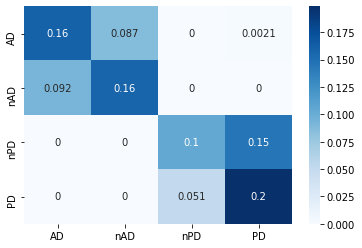

In [ ]:
import keras
import tensorflow as tf
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns
import numpy as np
img_width, img_height = 224, 224
filepath = "/content/drive/My Drive/kk1/modelResNet50.h5"
train_data_dir = '/content/drive/My Drive/Comparison paper folder with 1200 MRI'
batch_size = 40
val_split = 0.3
totalpics = 4800
# load the model
model = load_model(filepath)
train_datagen = ImageDataGenerator(validation_split=val_split,
                                   rescale=1. / 255)
 
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')
 
validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation')
Y_pred = model.predict_generator(validation_generator, validation_generator.samples // batch_size)
y_pred = np.argmax(Y_pred, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())   
print('Confusion Matrix')
k1 = confusion_matrix(validation_generator.classes, y_pred)
print(k1)
report = classification_report(true_classes, y_pred, target_names=class_labels)
print(report)
sns.heatmap(k1/np.sum(k1), annot=True, cmap='Blues',xticklabels = ["AD","nAD","nPD","PD"], yticklabels = ["AD","nAD","nPD","PD"])
# plt.show()